In [1]:
import pandas as pd

credits = pd.read_csv('data/credits.csv')

In [2]:
credits.head()


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [3]:
credits

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...,...
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506


In [4]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
from ast import literal_eval

def getPropListByJsonList(x, prop):
    if pd.isnull(x):
        return []
    jsonList = literal_eval(str(x))
    propList = []
    for val in jsonList:
        propList.append(val.get(prop))
    return propList

In [6]:
credits['actors'] = credits.cast.apply(lambda x: getPropListByJsonList(x, 'name'))
credits['crew_people'] = credits.crew.apply(lambda x: getPropListByJsonList(x, 'name'))

In [7]:
credits = credits.drop(['cast', 'crew'],1)

In [8]:
credits.head()

,id,actors,crew_people
0,862,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[John Lasseter, Joss Whedon, Andrew Stanton, J..."
1,8844,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Larry J. Franco, Jonathan Hensleigh, James Ho..."
2,15602,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[Howard Deutch, Mark Steven Johnson, Mark Stev..."
3,31357,"[Whitney Houston, Angela Bassett, Loretta Devi...","[Forest Whitaker, Ronald Bass, Ronald Bass, Ez..."
4,11862,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[Alan Silvestri, Elliot Davis, Nancy Meyers, N..."


In [9]:
credits_exploded_by_actors = credits.explode("actors")
credits_exploded_by_actors.to_csv('data/credits_exploded_actors.csv')

credits_exploded_by_crew = credits.explode("crew_people")
credits_exploded_by_crew.to_csv('data/credits_exploded_crew.csv')

In [10]:
actors = credits_exploded_by_actors.groupby("actors")

In [11]:
actors.head()

,id,actors,crew_people
0,862,Tom Hanks,"[John Lasseter, Joss Whedon, Andrew Stanton, J..."
0,862,Tim Allen,"[John Lasseter, Joss Whedon, Andrew Stanton, J..."
0,862,Don Rickles,"[John Lasseter, Joss Whedon, Andrew Stanton, J..."
0,862,Jim Varney,"[John Lasseter, Joss Whedon, Andrew Stanton, J..."
0,862,Wallace Shawn,"[John Lasseter, Joss Whedon, Andrew Stanton, J..."
...,...,...,...
45474,227506,Iwan Mosschuchin,"[Yakov Protazanov, Joseph N. Ermolieff]"
45474,227506,Nathalie Lissenko,"[Yakov Protazanov, Joseph N. Ermolieff]"
45474,227506,Pavel Pavlov,"[Yakov Protazanov, Joseph N. Ermolieff]"
45474,227506,Aleksandr Chabrov,"[Yakov Protazanov, Joseph N. Ermolieff]"


In [12]:
counts = credits_exploded_by_actors['actors'].value_counts()
counts

Bess Flowers          241
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     123
Gérard Depardieu      110
                     ... 
Wiktoria Padlewska      1
Robert Freund           1
Hasinatu Camara         1
Raúl Andrade            1
Jonathan Kramer         1
Name: actors, Length: 202747, dtype: int64

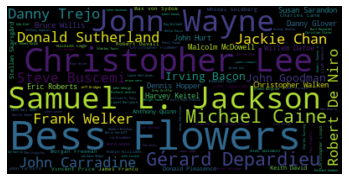

In [14]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(counts)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()